In [82]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

In [83]:
data = pd.read_csv("musk_csv.csv")
dataset = data.values

In [84]:
data = data.drop(columns='conformation_name',inplace=False, axis = 1)
data = data.drop(columns='molecule_name',inplace=False, axis = 1)
data.shape

(6598, 168)

In [85]:
X = data.drop(['class'], axis=1)
y = data['class']
X.shape, y.shape

((6598, 167), (6598,))

In [86]:
model = Sequential()
model.add(Dense(12, input_dim=167, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [87]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
model.fit(X, y, epochs=5, batch_size=10)

Epoch 1/5
6598/6598 [==============================] - 2s 296us/step - loss: 0.8039 - accuracy: 0.9777
Epoch 2/5
6598/6598 [==============================] - 2s 270us/step - loss: 0.0026 - accuracy: 0.9994
Epoch 3/5
6598/6598 [==============================] - 2s 268us/step - loss: 0.0099 - accuracy: 0.9986
Epoch 4/5
6598/6598 [==============================] - 2s 270us/step - loss: 7.8564e-04 - accuracy: 0.9997
Epoch 5/5
6598/6598 [==============================] - 2s 271us/step - loss: 6.3662e-07 - accuracy: 1.0000


In [89]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

6598/6598 [==============================] - 0s 33us/step
Accuracy: 100.00


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

score = model.evaluate(X_test, y_test,verbose=1)
print(score)


y_test.shape

1650/1650 [==============================] - 0s 54us/step
[1.9381241663582516e-07, 1.0]


(1650,)

In [91]:
predictions = model.predict_classes(X_test)
predictions.shape

(1650, 1)

In [92]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(predictions,y_test)
print('ROC AUC: %f' % auc)

ROC AUC: 1.000000


In [93]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[1403    0]
 [   0  247]]


In [94]:
from sklearn.metrics import cohen_kappa_score,f1_score
kappa = cohen_kappa_score(y_test, predictions)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 1.000000


In [95]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

F1 score: 1.000000


In [96]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)

Recall: 1.000000


In [97]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)

Precision: 1.000000


In [98]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)

Accuracy: 1.000000


In [99]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, verbose=0)

_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 1.000


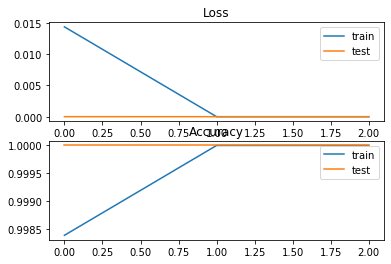

In [100]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()